# DS 2023 HW 6

## Instructions

Follow the prompts in this notebook.

Make use of code provided.

Respond with code to generate your answers.
|
If asked to provide a specific response, create a Markdown cell after your code cell(s) with the response.

NOTE: To save as a PDF, first export your notebook to HTML, open it in a brower, and the print the web page to PDF.

**10 Points**

## Student Info

Write your name and computer ID below.

- NAME: Sae-Jin Moon
- ID: rhn9qs

## Compliance with Homework Submission Guidelines

1 pt

## Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style='darkgrid', context='notebook') 

Read in the data file as a data frame called `DOC`.

In [3]:
data_src = "winereviews-DOC.csv"
DOC = pd.read_csv(data_src, index_col='doc_id')

## Tasks

### Task 1

1 pt

Create a data frame called `COUNTRY` that contains a row for each distinct value in `doc_country` and a column for the number of reviews (rows) associated with each country.

Display the first $5$ rows.

In [4]:
COUNTRY = DOC['doc_country'].value_counts().to_frame('count')
COUNTRY.head()

,count
doc_country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691


### Task 2

1 pt

Create a **count** plot showing the review count for each country, were the country names on the x-axis are **sorted** from highest to lowest counts and rotated $90\degree$.

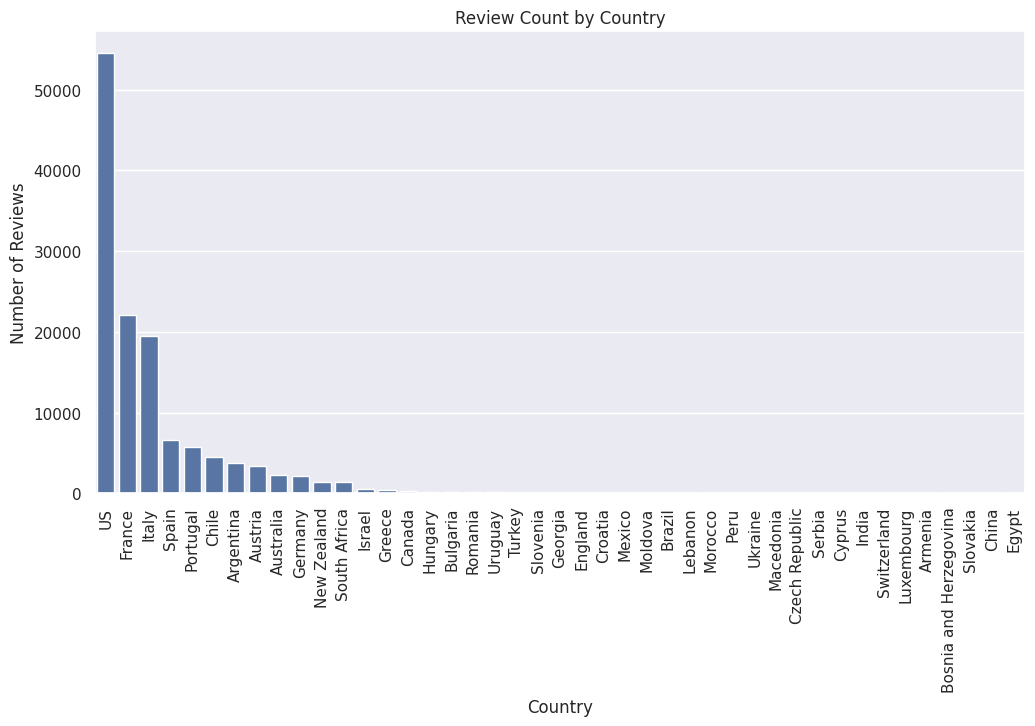

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(x='doc_country', data=DOC, order=COUNTRY.index)
plt.xticks(rotation=90)
plt.title('Review Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.show()

### Task 3

1 pt

By eye, what are the three most represented countries in the plot above, in desceding order of count?

Write your answer as a comma separated list below.

US, France, Italy

### Task 4

1 pt

Create a box plot of the counts in the `COUNTRY` data frame.

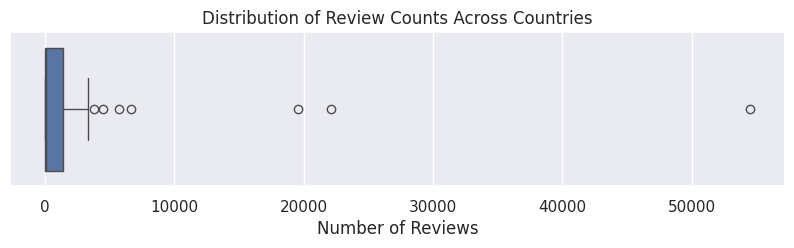

In [16]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=COUNTRY["count"])
plt.title('Distribution of Review Counts Across Countries')
plt.xlabel('Number of Reviews')
plt.show()

### Task 5

1 pt

Add two features to `COUNTRY`, one for the mean value of `doc_points` and one for the **median** value of `doc_price`. 

In [7]:
country_stats = DOC.groupby('doc_country').agg(
    mean_points=('doc_points', 'mean'),
    median_price=('doc_price', 'median')
)
COUNTRY = COUNTRY.join(country_stats)
COUNTRY.head()

,count,mean_points,median_price
doc_country,,,
US,54504,88.563720,30.0
France,22093,88.845109,25.0
Italy,19540,88.562231,28.0
Spain,6645,87.288337,18.0
Portugal,5691,88.250220,16.0


### Task 6

1 pt

Using the table you just created, create a scatter plot that compares median `doc_price` to mean `doc_points`.

Use the pattern found in Wednesday's activity key to put country labels on each point.

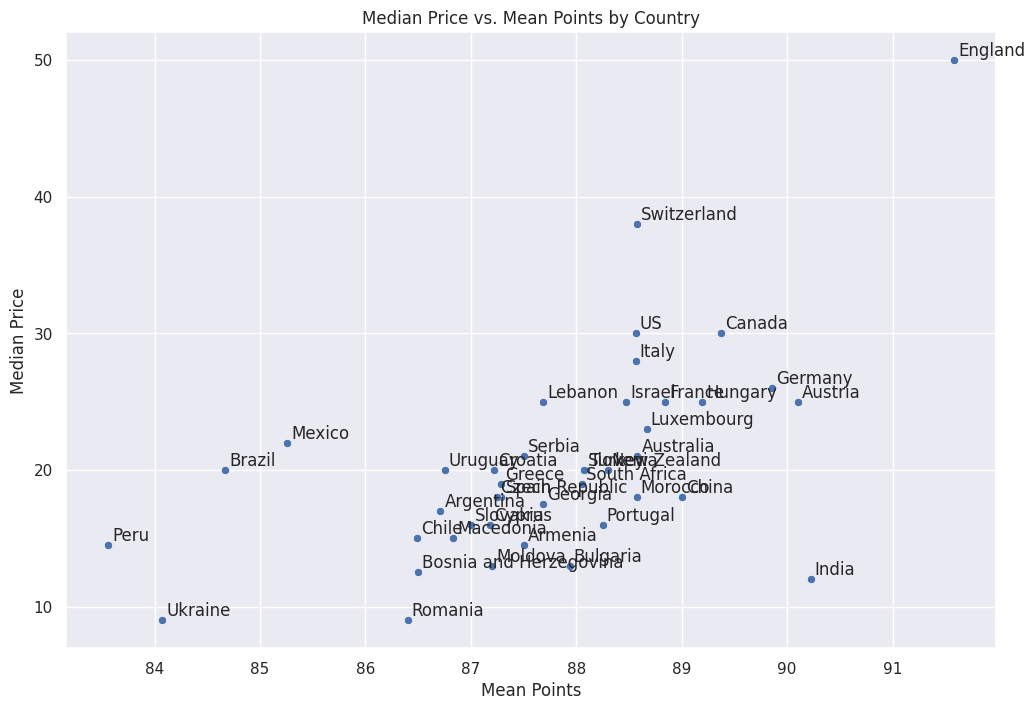

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=COUNTRY, x='mean_points', y='median_price')

for i, row in COUNTRY.iterrows():
    plt.annotate(i, (row['mean_points'], row['median_price']), xytext=(3, 3), textcoords='offset points')


plt.title('Median Price vs. Mean Points by Country')
plt.xlabel('Mean Points')
plt.ylabel('Median Price')
plt.show()

### Task 7

1 pt

Which country stands out as having the highest x and y values?

England

### Task 8

1 pt

Create a wide data frame called `TASTER_COUNTRY` with the following properties:

- axis $0$ contains the domain of `doc_taster`
- axis $1$ contains the domain of `doc_country`
- cells contain counts for the co-occurrence of `doc_taster` and `doc_country`

In [9]:
TASTER_COUNTRY = pd.crosstab(DOC['doc_taster'], DOC['doc_country'])
TASTER_COUNTRY.head()

doc_country,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
doc_taster,,,,,,,,,,,,,,,,,,,,,
Alexander Peartree,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,415,0,0
Anna Lee C. Iijima,0,0,0,0,1,0,19,15,0,0,...,0,1,26,0,0,0,5,2435,2,0
Anne Krebiehl MW,0,0,0,2207,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Carrie Dykes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,139,0,0
Christina Pickard,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0


### Task 9

1 pt

Create a data frame `LATIN` by executing the code below.

In [10]:
latin_countries = "Uruguay Argentina Chile Brazil Peru Mexico Spain".split()
LATIN = TASTER_COUNTRY[latin_countries].stack().to_frame('count')

Create a bar plot with `LATIN` that compares `doc_taster` and `count`.

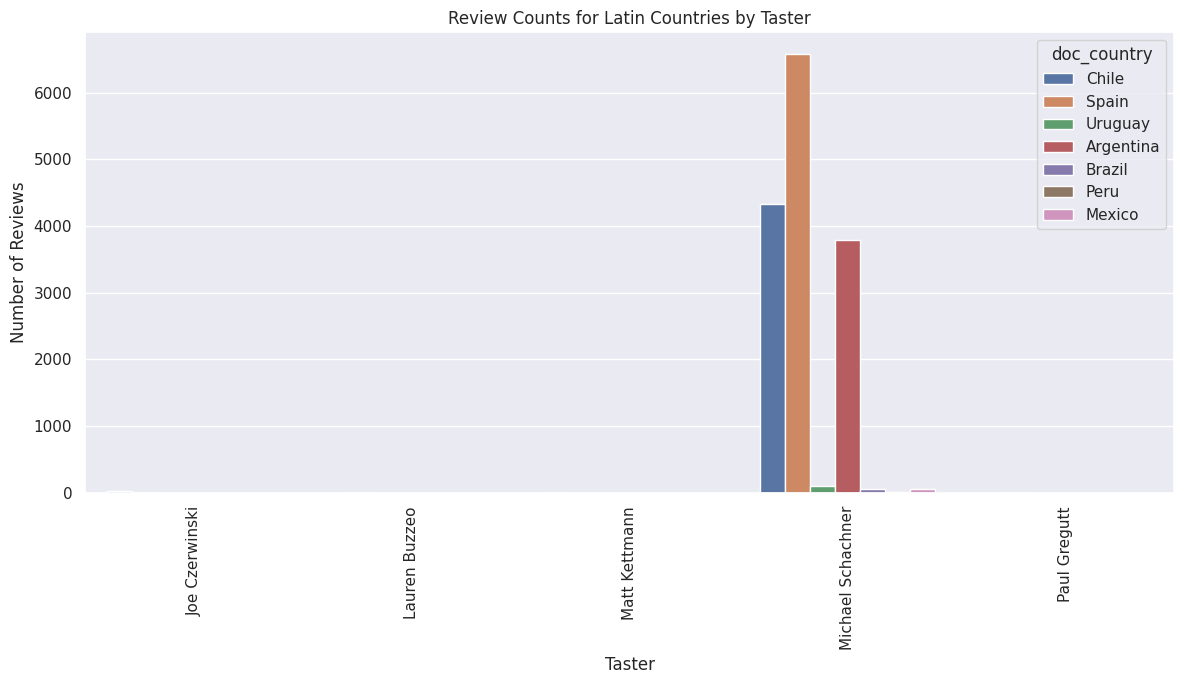

In [11]:
# ADD CODE HERE
LATIN_for_plot = LATIN.loc[LATIN['count'] > 0].reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=LATIN_for_plot, x='doc_taster', y='count', hue='doc_country')
plt.xticks(rotation=90)
plt.title('Review Counts for Latin Countries by Taster')
plt.xlabel('Taster')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

How many tasters appear to be significantly involved with writing reviews about the countries in `LATIN`?

Michael Schachner is the most significantly involved with writing reviews about the countries in `LATIN`.